In [10]:
# !pip install keras
# !pip install tensorflow

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [12]:
train = pd.read_csv('train.csv')

In [13]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = train.loc[train['label']==1,'pixel0':]
df
# df.to_csv('file.csv', index=False)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train[train['label']==1].sample(50).index

Int64Index([21111,  6062, 28983, 29031, 16854, 31978, 14955, 19522, 37934,
            19862, 14329, 13176,  1908, 30972,  2285,   249, 16742,  4774,
             2245,  1027, 38428,  5427, 11732,  4439, 34842, 13517, 36739,
            34751, 30517, 10957, 33482,  9202,  9210, 37023,  1221, 16550,
            20763, 23019, 41520,  1977,  9557, 40805, 14465,  6742, 34721,
            40897, 19336,  3488, 11348,  2881],
           dtype='int64')

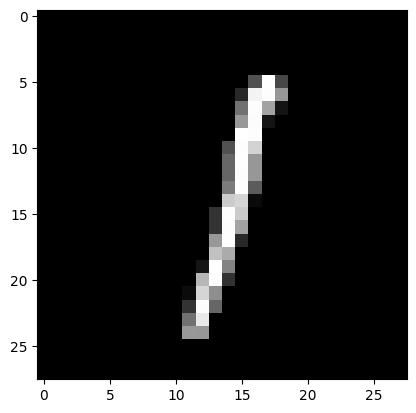

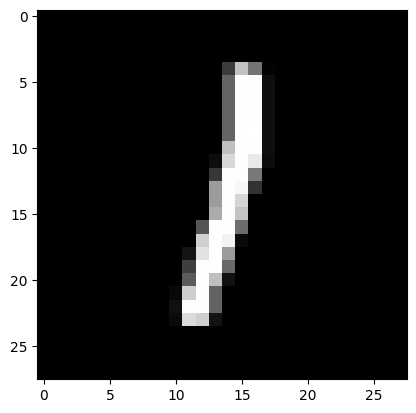

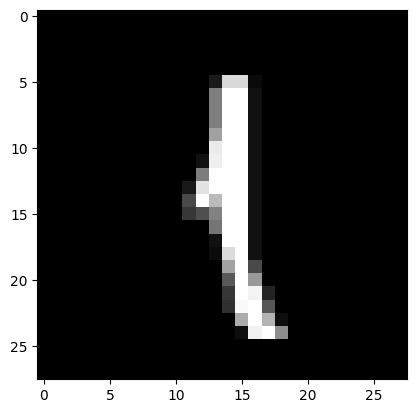

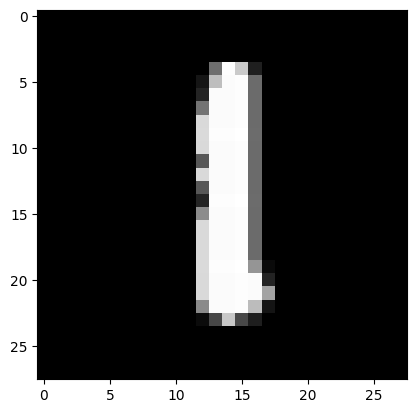

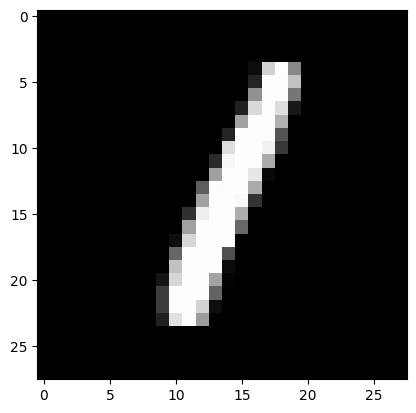

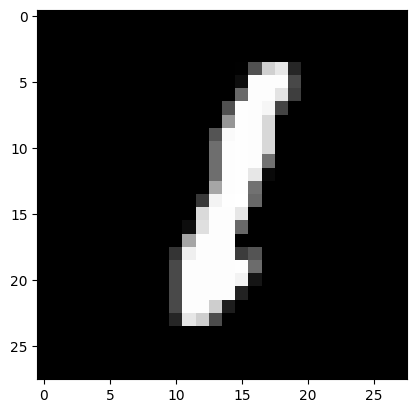

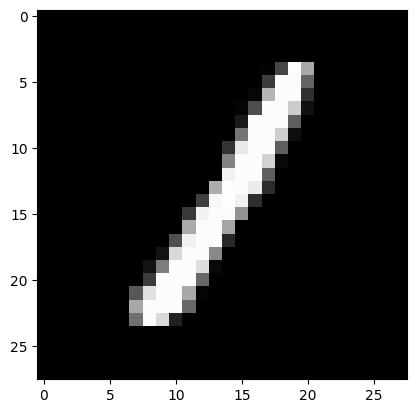

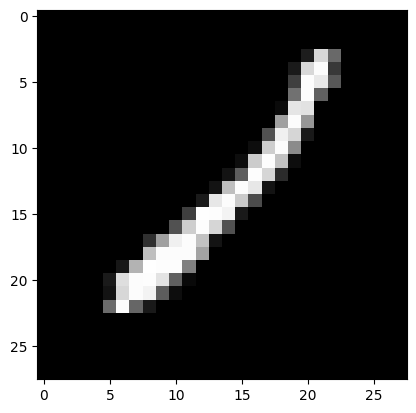

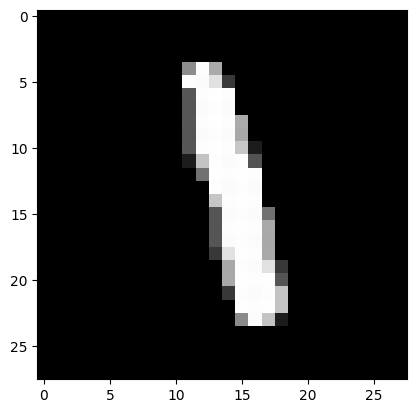

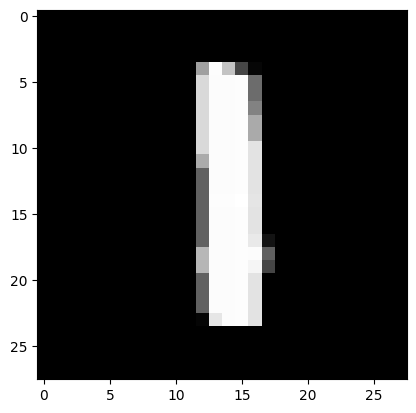

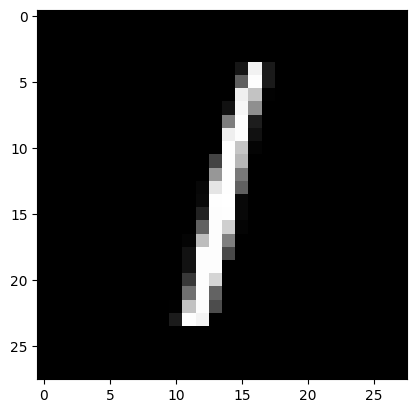

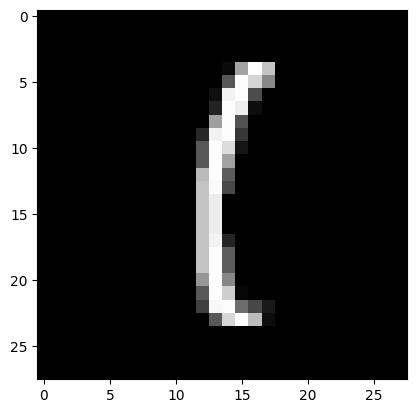

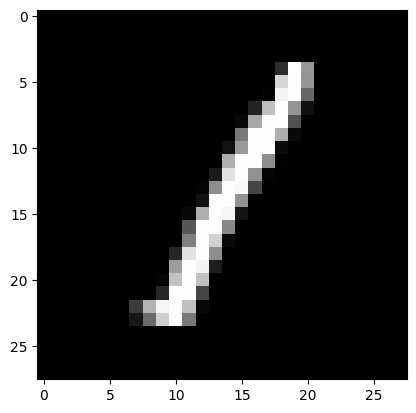

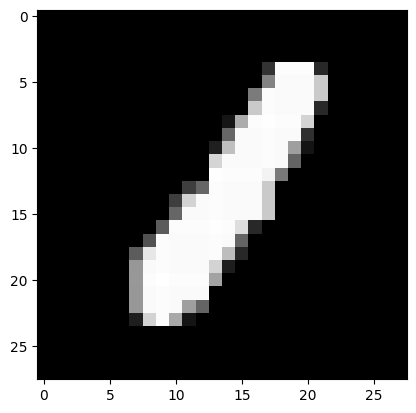

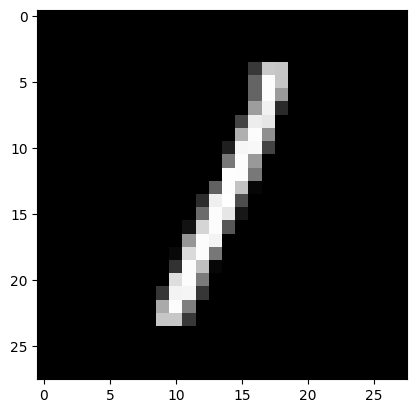

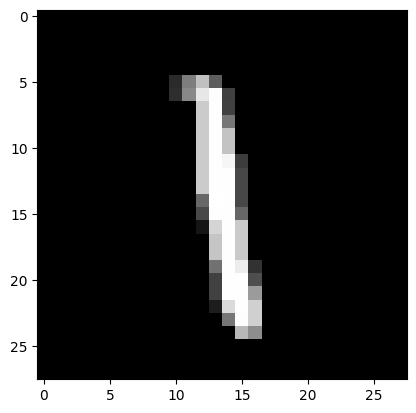

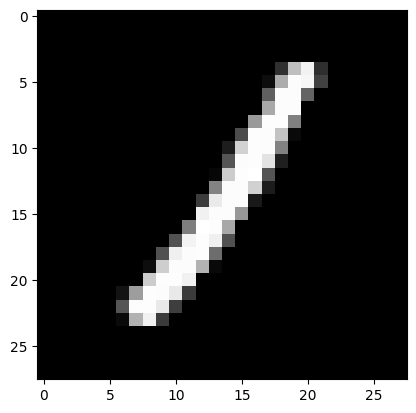

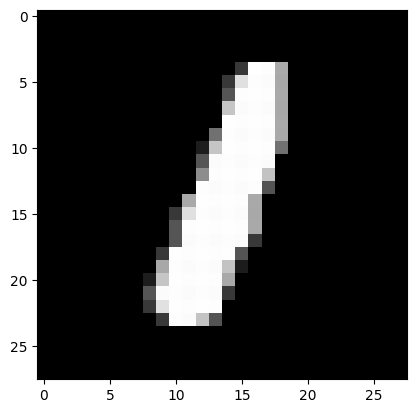

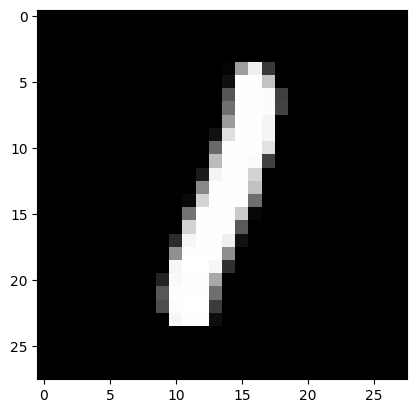

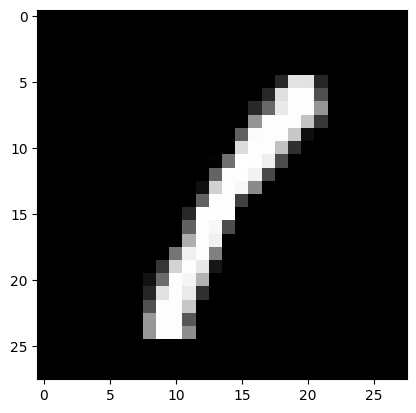

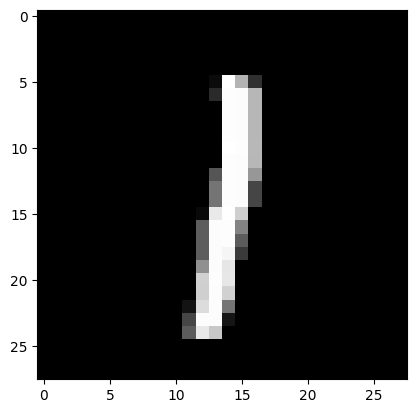

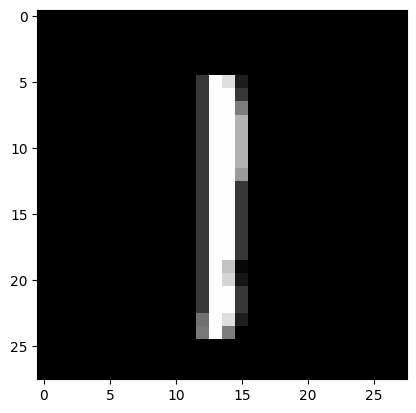

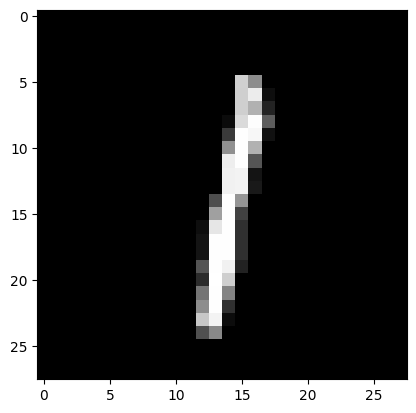

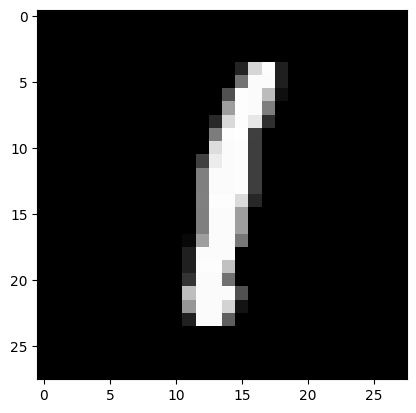

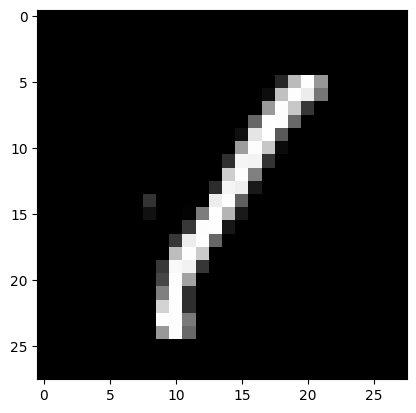

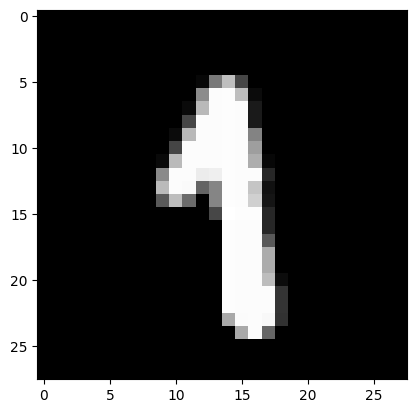

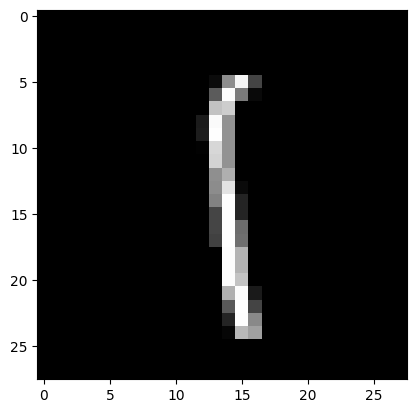

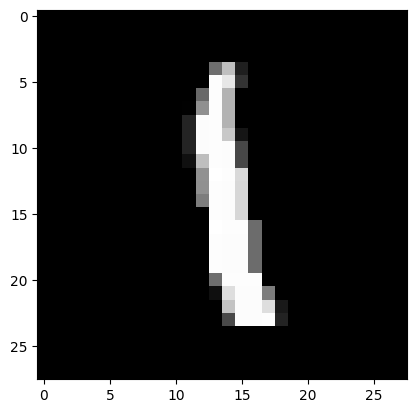

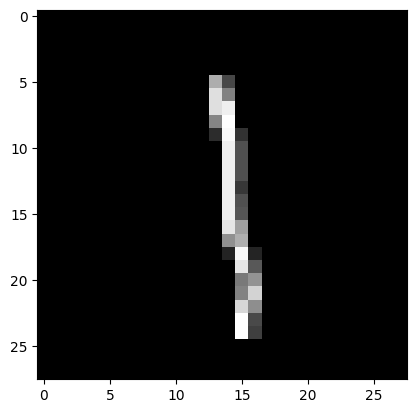

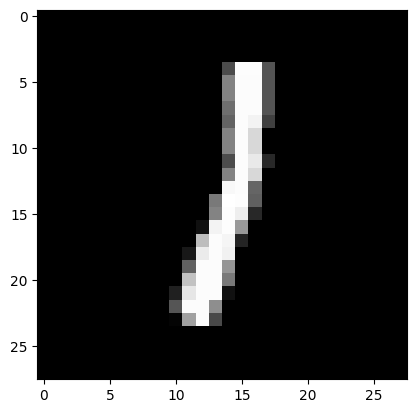

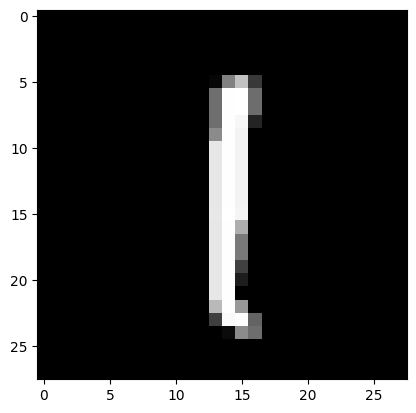

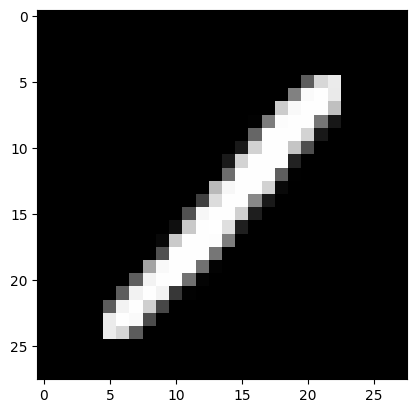

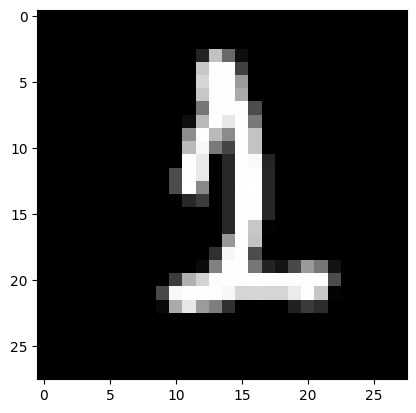

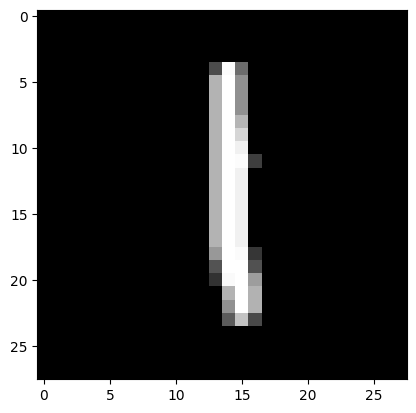

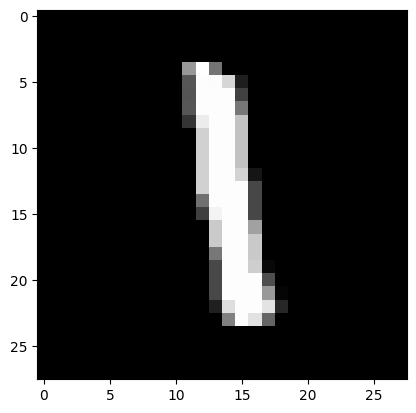

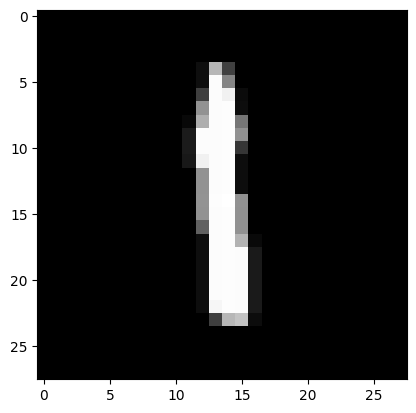

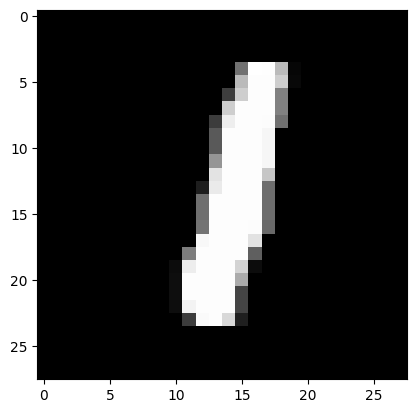

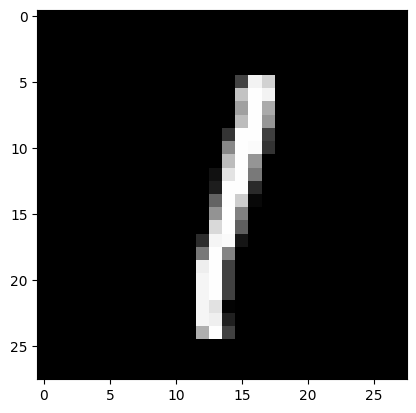

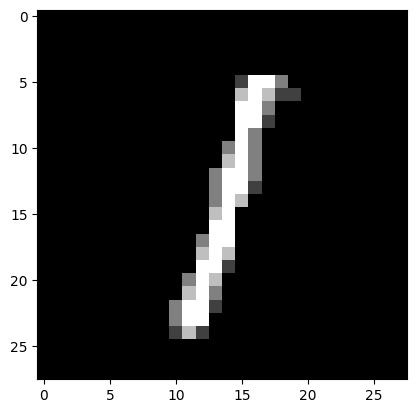

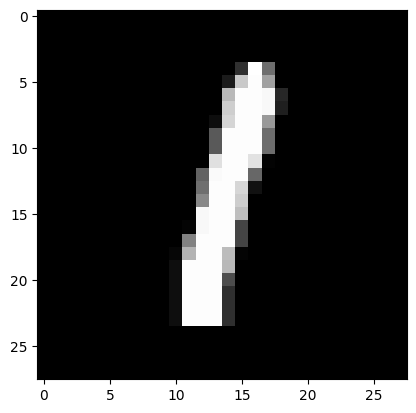

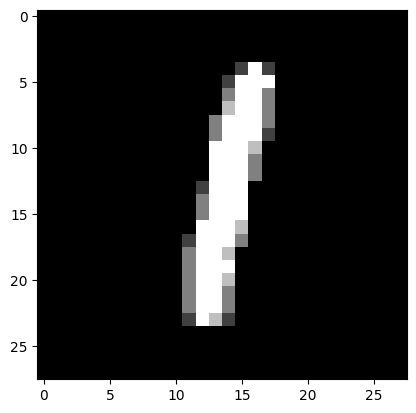

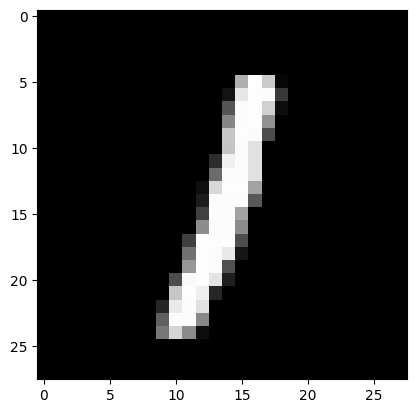

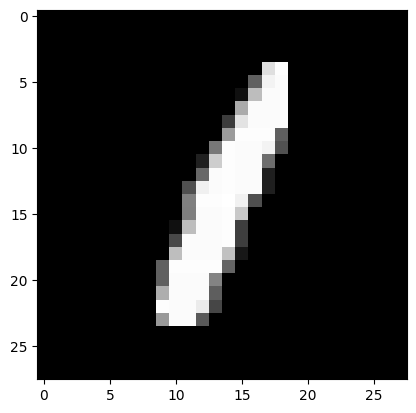

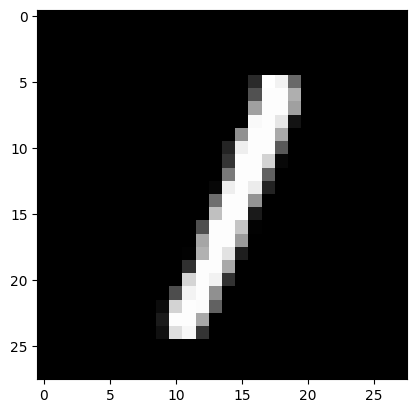

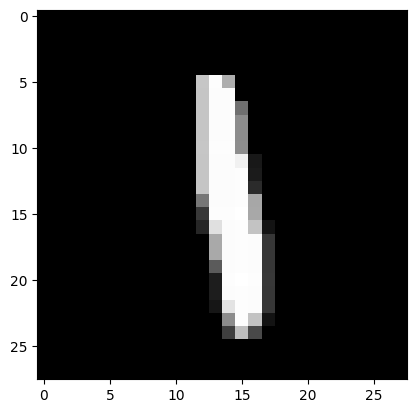

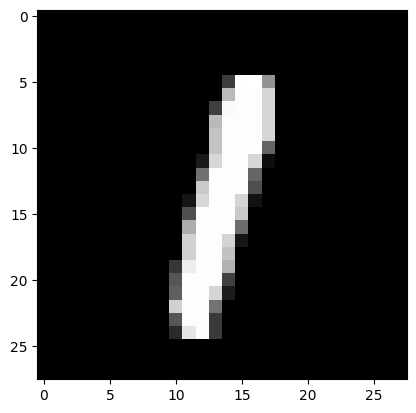

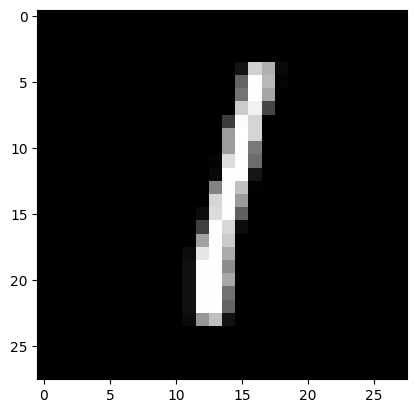

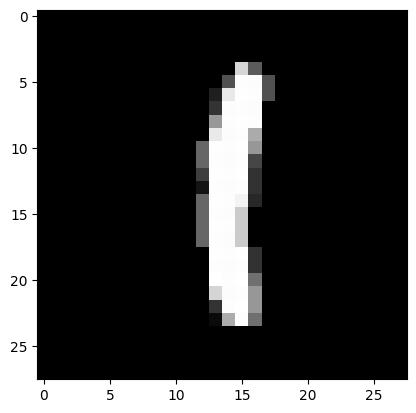

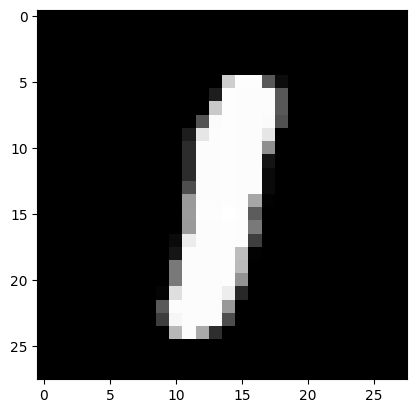

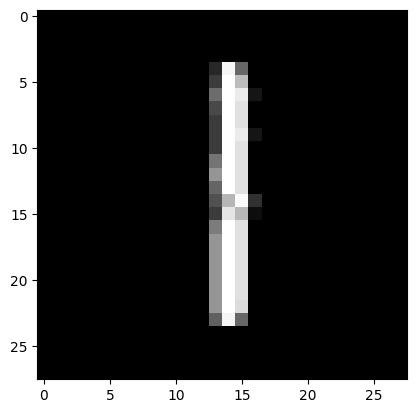

In [16]:
for i in train[train['label']==1].sample(50).index:
    num = np.array(train.iloc[i, 1:]).reshape(28, 28)
    plt.imshow(num, cmap='gray')  # Set the colormap to gray for black and white images
    plt.show()

In [17]:
train.iloc[3,1:].shape

(784,)

In [18]:
np.array(train.iloc[3,1:]).reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [19]:
df1 = pd.DataFrame(np.array(train.iloc[3,1:]).reshape(28,28))
# df1.to_csv('file2.csv')

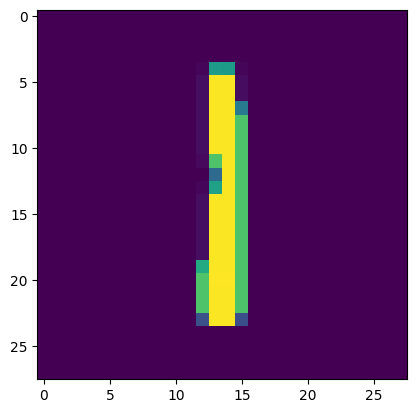

In [20]:
num = np.array(train.iloc[2,1:]).reshape(28,28)
plt.imshow(num)

In [21]:
train.shape

(42000, 785)

In [22]:
# making image with numpy array
num = np.array(train.iloc[3,1:]).reshape(28,28)
num

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

0 to 255
The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray.

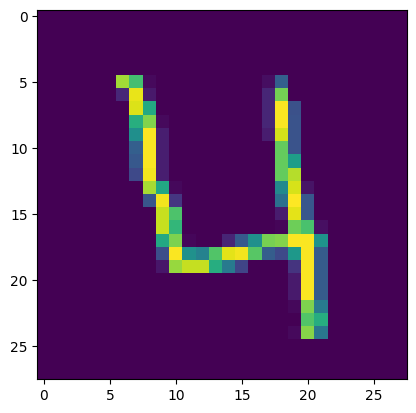

In [23]:
plt.imshow(num) # # imshow convert array to image

<AxesSubplot: xlabel='3', ylabel='Count'>

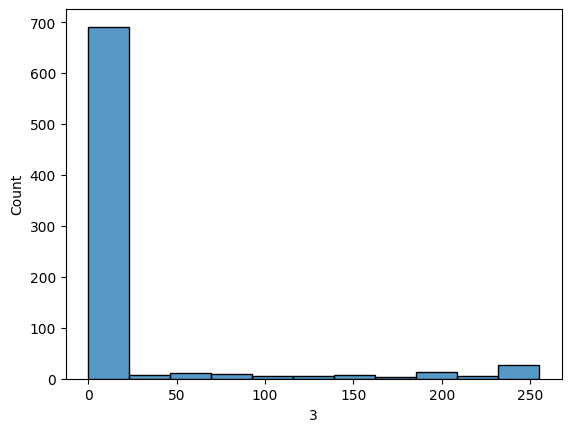

In [24]:
arr = train.iloc[3,1:]
sns.histplot(arr)

In [25]:
print(max(arr),min(arr))

255 0


In [26]:
train.isnull().sum().sum()

0

## Feature Engineering

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [28]:
np.array(train).shape


(42000, 785)

In [29]:
x=np.array(train)
# x
X_train = x[:,1:]
Y_train = x[:,0]


In [30]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1. In the case of X_train.reshape(-1, 28, 28, 1), it's reshaping X_train into a 4-dimensional array where:

2. The first dimension (-1) is inferred by NumPy based on the total size of X_train and the other specified dimensions.
3. The second and third dimensions are explicitly set to 28x28, indicating the height and width of the images.
4. The fourth dimension is set to 1, which is often used in image processing libraries like TensorFlow and Keras to represent a single channel (grayscale) for each pixel.


1. Number of samples.
2. Image height.
3. Image width.
4. Number of channels.






In [31]:
X_train.reshape(-1,28,28,1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [32]:
X_train.shape

(42000, 784)

In [33]:
X_train.reshape(-1,28,28,1).shape

(42000, 28, 28, 1)

In [34]:
# X_train = np.reshape(X_train,(-1,28,28,1))
X_train = X_train.reshape(-1,28,28,1)


This code snippet is using the ImageDataGenerator class from the Keras library, which is typically used for data augmentation in image datasets. Data augmentation is a technique used to artificially increase the size of a training dataset by applying various transformations to the existing images. This can help improve the generalization and robustness of the trained model.

Here's a breakdown of what each parameter in the ImageDataGenerator does:

rotation_range: Specifies the range (in degrees) for random rotations applied to the images. In this case, images may be rotated by up to 15 degrees in either direction.

height_shift_range: Specifies the range for randomly shifting the height of the images. This is a fraction of the total height. In this case, images may be shifted vertically by up to 10% of their height.

zoom_range: Specifies the range for random zooming applied to the images. A zoom range of 0.1 means that images may be zoomed in or out by up to 10%.

shear_range: Specifies the range for random shearing transformations applied to the images. Shearing is a transformation that shifts the coordinates of the pixels along one of the axes. In this case, images may be sheared by up to 10%.

In [35]:
dategen = ImageDataGenerator(
    rotation_range=15,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

dategen.fit(X_train)

In [36]:
X_train.shape

(42000, 28, 28, 1)

In [37]:
# now we reshape X_train back to our original values because ML model will not take values of shape (42000, 28, 28,1), 
# so we reshape it to (-1,784)

X_train = X_train.reshape(-1,784)


In [38]:
X_train.shape

(42000, 784)

In [39]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
X_test = pd.read_csv('test.csv')
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
predict = knn.predict(X_test)
predict.to_list()

/Users/pranavkumar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([2, 0, 9, ..., 3, 9, 2])

In [45]:
len(predict)

28000

In [50]:
data = pd.DataFrame({'Label': predict})

# Setting the index name as 'ImageID'
data.index.name = 'ImageID'

# Starting index from 1
data.index += 1

# Saving the DataFrame to a CSV file with the index starting from 1
data.to_csv('Submission.csv', index=True, index_label='ImageID')

In [53]:
data.head()

,Label
ImageID,
1,2
2,0
3,9
4,9
5,3
